In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import scipy

import sys
sys.path.append('..')

This notebook is a guide for the neural networks based models of the library of the project "". :)

Météo-France, CNRS, CNRM, Centre d’Etudes de la Neige \
Léo Catteau, Spring 2025

### Contents:
* [Linear](#first-bullet)
* [MLP](#second-bullet)
* [Autoencoder](#third-bullet)
* [GRIN](#fourth-bullet)

All neural networks based models are trained following the same procedure implemented by the Filler. 

### Linear training <a class="anchor" id="first-bullet"></a>

In [2]:
from data_provider.data_provider import DataProvider
from models.linear import linear
from trainer.Filler import Filler

from types import SimpleNamespace

/Users/leocatteau/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/leocatteau/opt/anaconda3/lib/python3.9/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [3]:
data_kwargs = SimpleNamespace()
data_kwargs.data = 'bdclim_clean'
data_kwargs.dataset = 'WindowHorizonDataset'
data_kwargs.root_path = '../../datasets/'
data_kwargs.data_path = 'bdclim_safran_2023-2024.nc'
data_kwargs.has_predictors = False
data_kwargs.scaler = None
data_kwargs.batch_size = 15
data_kwargs.mask_length = 24*7*3
data_kwargs.mask_proba = 0.5
data_kwargs.window = 24
data_kwargs.horizon = 0

data_provider = DataProvider(data_kwargs)
train_dataloader = data_provider.train_dataloader()
test_dataloader = data_provider.test_dataloader()

model_kwargs = dict(seq_dim=data_kwargs.window, temporal=True)
filler_kwargs = SimpleNamespace()
filler_kwargs.lr = 5e-4
filler_kwargs.epochs = 50
filler_kwargs.keep_proba = 1-data_kwargs.mask_proba

filler = Filler(linear, model_kwargs, filler_kwargs)

device:  cpu
device:  cpu


/Users/leocatteau/Desktop/EPFL/Météo-France/code/Meteo-France/notebook_guides/../data_provider/data_preparation.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data)


In [4]:
train_loss, test_loss = filler.train(train_dataloader=train_dataloader, test_dataloader=test_dataloader)
filler.save_model('../trained_models/linear_temporal.pt')

start training
Epoch 1/50, Train Loss: 19.08465870, Test Loss: 56.80436783, time: 1.14s
Epoch 2/50, Train Loss: 14.09686551, Test Loss: 41.71400471, time: 2.21s
Epoch 3/50, Train Loss: 10.98278387, Test Loss: 32.58730450, time: 3.25s
Epoch 4/50, Train Loss: 9.48489582, Test Loss: 26.74608707, time: 4.29s
Epoch 5/50, Train Loss: 8.00716272, Test Loss: 22.60224009, time: 5.33s
Epoch 6/50, Train Loss: 7.13233981, Test Loss: 20.04199867, time: 6.39s
Epoch 7/50, Train Loss: 6.61914510, Test Loss: 18.33712206, time: 7.42s
Epoch 8/50, Train Loss: 6.26595915, Test Loss: 17.15735950, time: 8.45s
Epoch 9/50, Train Loss: 5.99434849, Test Loss: 16.32947006, time: 9.51s
Epoch 10/50, Train Loss: 5.84252607, Test Loss: 15.74701176, time: 10.54s
Epoch 11/50, Train Loss: 5.58259379, Test Loss: 15.32127991, time: 11.61s
Epoch 12/50, Train Loss: 5.57734919, Test Loss: 15.01025925, time: 12.65s
Epoch 13/50, Train Loss: 5.64308064, Test Loss: 14.80302038, time: 13.82s
Epoch 14/50, Train Loss: 5.44992729, T

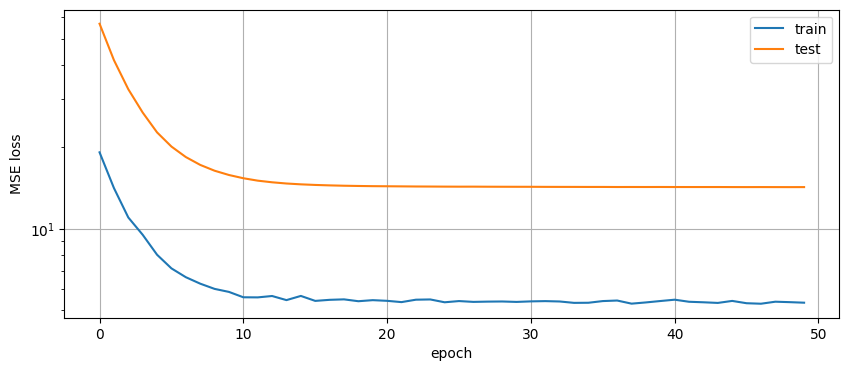

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.yscale('log')
# plt.ylim(0.01, np.max(train_loss)*1.1)
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.grid()
plt.legend()
plt.show()

### MLP training <a class="anchor" id="second-bullet"></a>

In [2]:
from data_provider.data_provider import DataProvider
from models.MLP import MLP
from trainer.Filler import Filler

from types import SimpleNamespace

/Users/leocatteau/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/leocatteau/opt/anaconda3/lib/python3.9/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


In [3]:
data_kwargs = SimpleNamespace()
data_kwargs.data = 'bdclim_clean'
data_kwargs.dataset = 'WindowHorizonDataset'
data_kwargs.root_path = '../../datasets/'
data_kwargs.data_path = 'bdclim_safran_2023-2024.nc'
data_kwargs.has_predictors = False
data_kwargs.scaler = None
data_kwargs.batch_size = 50
data_kwargs.mask_length = 24*7*3
data_kwargs.mask_proba = 0.5
data_kwargs.window = 24
data_kwargs.horizon = 0

data_provider = DataProvider(data_kwargs)
train_dataloader = data_provider.train_dataloader()
test_dataloader = data_provider.test_dataloader()

model_kwargs = dict(seq_dim=data_kwargs.window, hidden_dim=2*data_kwargs.window, temporal=True)
filler_kwargs = SimpleNamespace()
filler_kwargs.lr = 5e-4
filler_kwargs.epochs = 50
filler_kwargs.keep_proba = 1-data_kwargs.mask_proba

filler = Filler(MLP, model_kwargs, filler_kwargs)

device:  cpu
device:  cpu


/Users/leocatteau/Desktop/EPFL/Météo-France/code/Meteo-France/notebook_guides/../data_provider/data_preparation.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data)


In [4]:
train_loss, test_loss = filler.train(train_dataloader=train_dataloader, test_dataloader=test_dataloader)
filler.save_model('../trained_models/MLP.pt')

start training
Epoch 1/50, Train Loss: 9.95505524, Test Loss: 29.08160082, time: 0.77s
Epoch 2/50, Train Loss: 8.59142196, Test Loss: 24.43027687, time: 1.38s
Epoch 3/50, Train Loss: 7.57978880, Test Loss: 20.94436741, time: 1.99s
Epoch 4/50, Train Loss: 6.74621427, Test Loss: 18.46388149, time: 2.61s
Epoch 5/50, Train Loss: 6.27344239, Test Loss: 16.71965504, time: 3.22s
Epoch 6/50, Train Loss: 5.85288656, Test Loss: 15.59632524, time: 3.83s
Epoch 7/50, Train Loss: 5.64738333, Test Loss: 14.92326260, time: 4.43s
Epoch 8/50, Train Loss: 5.49440646, Test Loss: 14.56497288, time: 5.02s
Epoch 9/50, Train Loss: 5.37493289, Test Loss: 14.40730890, time: 5.59s
Epoch 10/50, Train Loss: 5.35757732, Test Loss: 14.34601243, time: 6.17s
Epoch 11/50, Train Loss: 5.35825765, Test Loss: 14.31695016, time: 6.76s
Epoch 12/50, Train Loss: 5.35209978, Test Loss: 14.28647010, time: 7.34s
Epoch 13/50, Train Loss: 5.34806824, Test Loss: 14.25176811, time: 7.92s
Epoch 14/50, Train Loss: 5.33315480, Test Los

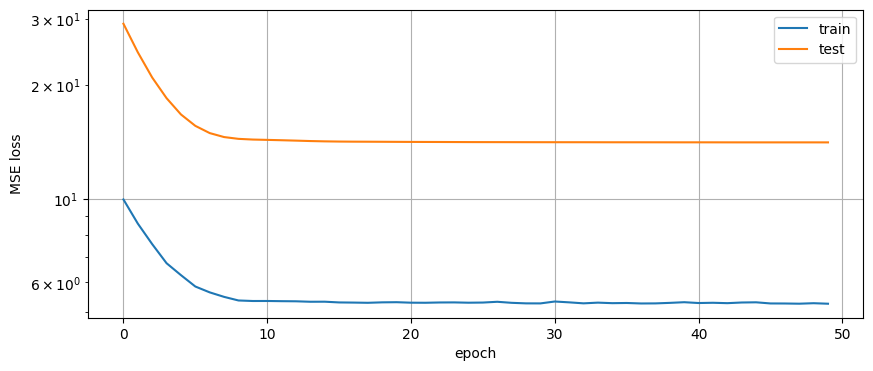

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.yscale('log')
# plt.ylim(0.01, np.max(train_loss)*1.1)
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.grid()
plt.legend()
plt.show()

### Autoencoder <a class="anchor" id="third-bullet"></a>

In [10]:
from data_provider.data_provider import DataProvider
from models.MLP import MLP
from trainer.Filler import Filler

from types import SimpleNamespace

In [11]:
data_kwargs = SimpleNamespace()
data_kwargs.data = 'bdclim_clean'
data_kwargs.dataset = 'WindowHorizonDataset'
data_kwargs.root_path = '../../datasets/'
data_kwargs.data_path = 'bdclim_safran_2023-2024.nc'
data_kwargs.has_predictors = False
data_kwargs.scaler = None
data_kwargs.batch_size = 50
data_kwargs.mask_length = 24*7*3
data_kwargs.mask_proba = 0.5
data_kwargs.window = 24
data_kwargs.horizon = 0

data_provider = DataProvider(data_kwargs)
train_dataloader = data_provider.train_dataloader()
test_dataloader = data_provider.test_dataloader()

model_kwargs = dict(seq_dim=data_provider.data.n_nodes, hidden_dim=int(0.25*data_provider.data.n_nodes))
filler_kwargs = SimpleNamespace()
filler_kwargs.lr = 1e-4
filler_kwargs.epochs = 100
filler_kwargs.keep_proba = 1-data_kwargs.mask_proba

filler = Filler(MLP, model_kwargs, filler_kwargs)

device:  cpu
device:  cpu


/Users/leocatteau/Desktop/EPFL/Météo-France/code/Meteo-France/notebook_guides/../data_provider/data_preparation.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data)


In [12]:
train_loss, test_loss = filler.train(train_dataloader=train_dataloader, test_dataloader=test_dataloader)
filler.save_model('../trained_models/autoencoder.pt')

start training
Epoch 1/100, Train Loss: 7.73477805, Test Loss: 18.58970165, time: 0.24s
Epoch 2/100, Train Loss: 6.11546588, Test Loss: 15.21323999, time: 0.45s
Epoch 3/100, Train Loss: 5.37218964, Test Loss: 13.85432974, time: 0.66s
Epoch 4/100, Train Loss: 5.06601298, Test Loss: 13.19611454, time: 0.88s
Epoch 5/100, Train Loss: 4.84670877, Test Loss: 12.82636261, time: 1.08s
Epoch 6/100, Train Loss: 4.68223953, Test Loss: 12.73241075, time: 1.30s
Epoch 7/100, Train Loss: 4.54317880, Test Loss: 12.65373961, time: 1.50s
Epoch 8/100, Train Loss: 4.42599225, Test Loss: 12.35322253, time: 1.72s
Epoch 9/100, Train Loss: 4.29724348, Test Loss: 12.02540175, time: 1.93s
Epoch 10/100, Train Loss: 4.12780803, Test Loss: 11.78357188, time: 2.18s
Epoch 11/100, Train Loss: 4.00059402, Test Loss: 11.51208496, time: 2.41s
Epoch 12/100, Train Loss: 3.86511397, Test Loss: 11.27323246, time: 2.64s
Epoch 13/100, Train Loss: 3.69968903, Test Loss: 10.98384507, time: 2.88s
Epoch 14/100, Train Loss: 3.5673

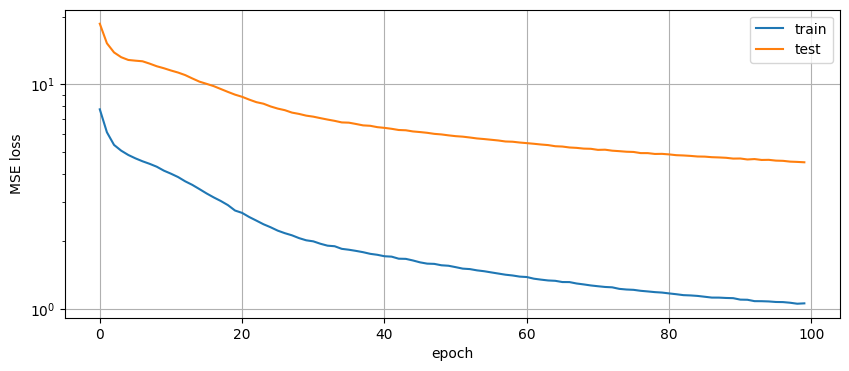

In [13]:
plt.figure(figsize=(10, 4))
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.yscale('log')
# plt.ylim(0.01, np.max(train_loss)*1.1)
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.grid()
plt.legend()
plt.show()

### GRIN <a class="anchor" id="fourth-bullet"></a>

In [2]:
from data_provider.data_provider import DataProvider
from models.GRIN import GRINet
from trainer.Filler import Filler

from types import SimpleNamespace

/Users/leocatteau/opt/anaconda3/lib/python3.9/site-packages/dask/dataframe/_pyarrow_compat.py:17: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(
/Users/leocatteau/opt/anaconda3/lib/python3.9/site-packages/umap/plot.py:203: NumbaDeprecationWarning: The keyword argument 'nopython=False' was supplied. From Numba 0.59.0 the default is being changed to True and use of 'nopython=False' will raise a warning as the argument will have no effect. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit(nopython=False)


device:  cpu


/Users/leocatteau/Desktop/EPFL/Météo-France/code/Meteo-France/notebook_guides/../data_provider/data_preparation.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.data = torch.tensor(self.data)
/Users/leocatteau/opt/anaconda3/lib/python3.9/site-packages/umap/plot.py:894: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


device:  cpu


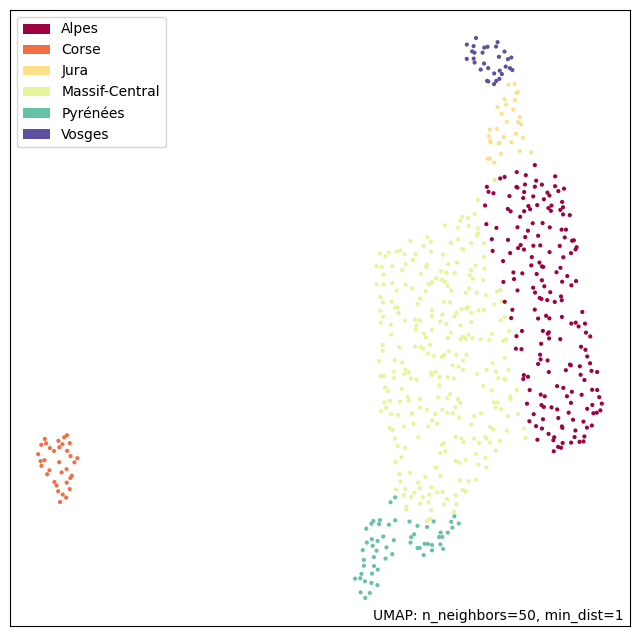

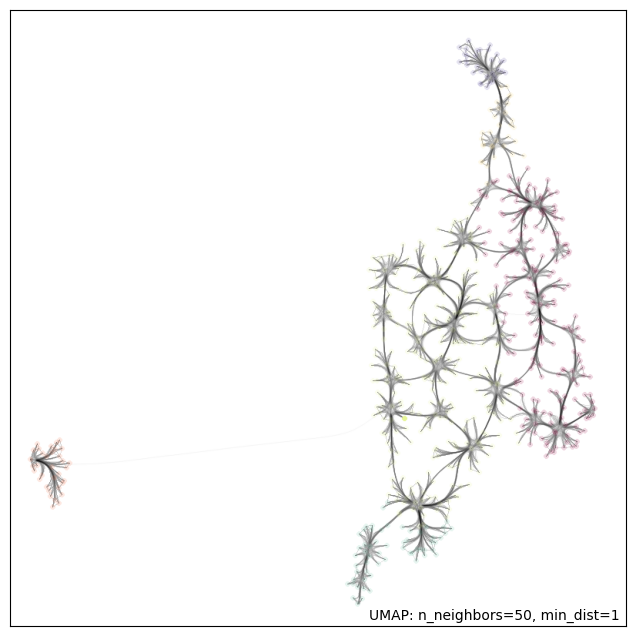

In [3]:
data_kwargs = SimpleNamespace()
data_kwargs.data = 'bdclim_clean'
data_kwargs.dataset = 'WindowHorizonDataset'
data_kwargs.root_path = '../../datasets/'
data_kwargs.data_path = 'bdclim_safran_2023-2024.nc'
data_kwargs.scaler = None
data_kwargs.batch_size = 15
data_kwargs.mask_length = 24*7*3
data_kwargs.mask_proba = 0.5
data_kwargs.window = 24
data_kwargs.horizon = 0

data_provider = DataProvider(data_kwargs)
adjacency_matrix = torch.FloatTensor(data_provider.data.umap_adjacency(threshold=0.00, verbose=True)).to('cuda:0' if torch.cuda.is_available() else 'cpu')
# adjacency_matrix = torch.FloatTensor(data_provider.data.correlation_adjacency(threshold=0.9, verbose=True)).to('cuda:0' if torch.cuda.is_available() else 'cpu')
train_dataloader = data_provider.train_dataloader()
test_dataloader = data_provider.test_dataloader()

model_kwargs = dict(adj=adjacency_matrix, d_in=1)
filler_kwargs = SimpleNamespace()
filler_kwargs.lr = 1e-5
filler_kwargs.epochs = 10
filler_kwargs.keep_proba = 1-data_kwargs.mask_proba

filler = Filler(GRINet, model_kwargs, filler_kwargs)

In [ ]:
train_loss, test_loss = filler.train(train_dataloader=train_dataloader, test_dataloader=test_dataloader)

start training
Epoch 1/10, Train Loss: 165.53870509, Test Loss: 247.29256668, time: 244.51s


KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(train_loss, label='train')
plt.plot(test_loss, label='test')
plt.yscale('log')
plt.ylim(0, np.max(train_loss)*1.1)
plt.xlabel('epoch')
plt.ylabel('MSE loss')
plt.grid()
plt.legend()
plt.show()